Введение в pandas. У любой задачи может быть несколько способов решения

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Задача 1. найти евклидово расстояние между двумя Series (точками) a и b, не используя встроенную формулу

In [2]:
a = pd.Series([2, 4, 6, 8])
b = pd.Series([1, 3, 5, 7])

In [3]:
#Ваш код
distance = ((a - b) ** 2).sum() ** 0.5
distance

2.0

Задача 2. найти максимально возможное абсолютное значение корреляции каждого столбца с другими столбцами в df

In [4]:
df = pd.DataFrame(np.random.randint(1, 100, 16).reshape(4, 4), columns=list('efgh'), index=list('abcd'))

In [5]:
#Ваш код
df

,e,f,g,h
a,37,71,93,98
b,84,98,50,8
c,53,94,23,20
d,37,26,57,15


In [6]:
corr_matrix = df.corr().abs()
corr_matrix

,e,f,g,h
e,1.000000,0.709334,0.414361,0.544586
f,0.709334,1.000000,0.337427,0.041963
g,0.414361,0.337427,1.000000,0.814552
h,0.544586,0.041963,0.814552,1.000000


In [7]:
max_corr = [corr_matrix[col].drop(corr_matrix.index[i]).max() for i, col in enumerate(corr_matrix)]
max_corr

[0.7093343082608503,
 0.7093343082608503,
 0.8145522103634748,
 0.8145522103634748]

Задача 3. нормализовать все столбцы в DataFrame:

    1. Нормализуйте все столбцы df путём вычитания среднего значения столбца и деления на стандартное отклонение.
    2. Сделайте так, чтобы все значения в df находились в диапазоне от 0 до 1.


In [8]:
df = pd.DataFrame(np.random.randint(1, 100, 16).reshape(4, 4))

In [9]:
#Ваш код
df

,0,1,2,3
0,16,50,14,6
1,64,16,44,83
2,45,14,95,8
3,35,68,13,24


In [10]:
# 1
normalized_df = (df - df.mean()) / df.std()
normalized_df

,0,1,2,3
0,-1.199001,0.491354,-0.715070,-0.672165
1,1.199001,-0.793725,0.065006,1.462132
2,0.249792,-0.869318,1.391136,-0.616729
3,-0.249792,1.171690,-0.741073,-0.173238


In [11]:
# 2
normalized_df = (df - df.min()) / (df.max() - df.min())
normalized_df

,0,1,2,3
0,0.000000,0.666667,0.012195,0.000000
1,1.000000,0.037037,0.378049,1.000000
2,0.604167,0.000000,1.000000,0.025974
3,0.395833,1.000000,0.000000,0.233766


Задача 4. объединить два DataFrame по двум столбцам так, чтобы остались только общие строки : df1 и df2 по столбцам fruit-frukt и weight-ves.

In [12]:
df1 = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                    'weight': ['low', 'medium', 'high'] * 3,
                    'price': np.random.randint(0, 100, 9)})

df2 = pd.DataFrame({'frukt': ['apple', 'banana', 'melon'] * 2,
                    'ves': ['low', 'high'] * 3,
                    'price': np.random.randint(0, 100, 6)})

In [13]:
#Ваш код
df1

,fruit,weight,price
0,apple,low,70
1,banana,medium,49
2,orange,high,8
3,apple,low,24
4,banana,medium,36
5,orange,high,66
6,apple,low,26
7,banana,medium,51
8,orange,high,14


In [14]:
df2

,frukt,ves,price
0,apple,low,43
1,banana,high,24
2,melon,low,67
3,apple,high,92
4,banana,low,67
5,melon,high,77


In [15]:
new_df = pd.merge(df1, df2, how='inner', left_on=['fruit', 'weight'], right_on=['frukt', 'ves'])
new_df

,fruit,weight,price_x,frukt,ves,price_y
0,apple,low,70,apple,low,43
1,apple,low,24,apple,low,43
2,apple,low,26,apple,low,43


Задача 5. Вывести число уникальных значений во всём DataFrame

In [16]:
df = pd.DataFrame(np.random.randint(1, 10, 25).reshape(5, 5), columns=list('abcde'))

In [17]:
#Ваш код
df

,a,b,c,d,e
0,6,1,4,3,9
1,6,7,2,2,6
2,1,5,5,8,4
3,7,1,3,5,9
4,8,8,7,3,8


In [18]:
unique_arr = np.unique(df.values)
len(unique_arr)

9

Задача 6. создать новый столбец, который содержит номера ближайших по евклидовому расстоянию столбцов.

In [19]:
df = pd.DataFrame(np.random.randint(1, 100, 25).reshape(5, 5), columns=list('abcde'), index=list('abcde'))

In [20]:
#Ваш код
df

,a,b,c,d,e
a,36,3,82,97,49
b,98,49,28,33,23
c,90,20,86,89,4
d,38,84,31,44,32
e,24,92,87,10,4


In [21]:
euclidean_distance = lambda a, b: ((a - b) ** 2).sum() ** 0.5

Задача 7. Поменяйте местами 2 и 5 строки  массива x.

In [22]:
x = np.arange(25).reshape(5,5)

In [23]:
#Ваш код
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [24]:
x[[1, 4]] = x[[4, 1]]
x

array([[ 0,  1,  2,  3,  4],
       [20, 21, 22, 23, 24],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [ 5,  6,  7,  8,  9]])

Задача 8. Найдите уникальные значения и их количество в столбце species таблицы iris.

In [25]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='object')

In [26]:
#Ваш код
iris

array([[b'5.1', b'3.5', b'1.4', b'0.2', b'Iris-setosa'],
       [b'4.9', b'3.0', b'1.4', b'0.2', b'Iris-setosa'],
       [b'4.7', b'3.2', b'1.3', b'0.2', b'Iris-setosa'],
       [b'4.6', b'3.1', b'1.5', b'0.2', b'Iris-setosa'],
       [b'5.0', b'3.6', b'1.4', b'0.2', b'Iris-setosa'],
       [b'5.4', b'3.9', b'1.7', b'0.4', b'Iris-setosa'],
       [b'4.6', b'3.4', b'1.4', b'0.3', b'Iris-setosa'],
       [b'5.0', b'3.4', b'1.5', b'0.2', b'Iris-setosa'],
       [b'4.4', b'2.9', b'1.4', b'0.2', b'Iris-setosa'],
       [b'4.9', b'3.1', b'1.5', b'0.1', b'Iris-setosa'],
       [b'5.4', b'3.7', b'1.5', b'0.2', b'Iris-setosa'],
       [b'4.8', b'3.4', b'1.6', b'0.2', b'Iris-setosa'],
       [b'4.8', b'3.0', b'1.4', b'0.1', b'Iris-setosa'],
       [b'4.3', b'3.0', b'1.1', b'0.1', b'Iris-setosa'],
       [b'5.8', b'4.0', b'1.2', b'0.2', b'Iris-setosa'],
       [b'5.7', b'4.4', b'1.5', b'0.4', b'Iris-setosa'],
       [b'5.4', b'3.9', b'1.3', b'0.4', b'Iris-setosa'],
       [b'5.1', b'3.5', b'1.4',

In [27]:
unique, count = np.unique(iris[:, -1], return_counts=True)
list(zip(unique, count))

[(b'Iris-setosa', 50), (b'Iris-versicolor', 50), (b'Iris-virginica', 50)]

Задача 9. 
Найдите значение второго самого длинного petallength вида setosa в таблице iris.

In [28]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='object')

In [29]:
#Ваш код
iris

array([[b'5.1', b'3.5', b'1.4', b'0.2', b'Iris-setosa'],
       [b'4.9', b'3.0', b'1.4', b'0.2', b'Iris-setosa'],
       [b'4.7', b'3.2', b'1.3', b'0.2', b'Iris-setosa'],
       [b'4.6', b'3.1', b'1.5', b'0.2', b'Iris-setosa'],
       [b'5.0', b'3.6', b'1.4', b'0.2', b'Iris-setosa'],
       [b'5.4', b'3.9', b'1.7', b'0.4', b'Iris-setosa'],
       [b'4.6', b'3.4', b'1.4', b'0.3', b'Iris-setosa'],
       [b'5.0', b'3.4', b'1.5', b'0.2', b'Iris-setosa'],
       [b'4.4', b'2.9', b'1.4', b'0.2', b'Iris-setosa'],
       [b'4.9', b'3.1', b'1.5', b'0.1', b'Iris-setosa'],
       [b'5.4', b'3.7', b'1.5', b'0.2', b'Iris-setosa'],
       [b'4.8', b'3.4', b'1.6', b'0.2', b'Iris-setosa'],
       [b'4.8', b'3.0', b'1.4', b'0.1', b'Iris-setosa'],
       [b'4.3', b'3.0', b'1.1', b'0.1', b'Iris-setosa'],
       [b'5.8', b'4.0', b'1.2', b'0.2', b'Iris-setosa'],
       [b'5.7', b'4.4', b'1.5', b'0.4', b'Iris-setosa'],
       [b'5.4', b'3.9', b'1.3', b'0.4', b'Iris-setosa'],
       [b'5.1', b'3.5', b'1.4',

In [30]:
sorted(iris[iris[:, -1] == b'Iris-setosa'][:, 0])[-2]

b'5.7'

Задача 10. Найдите повторяющиеся значения (начиная со второго вхождения) в заданном массиве и отметьте их как True. Первое вхождение отмечайте как False.

In [31]:
np.random.seed(10)
a = np.random.randint(0, 7, 10)
print(a)

[1 5 4 0 1 3 4 1 5 0]


In [32]:
#Ваш код
unique = set()
res = []
for value in a:
    if value in unique:
        res.append(True)
    else:
        unique.add(value)
        res.append(False)
res

[False, False, False, False, True, False, True, True, True, True]

Задача 11. Очистка данных. Преобразовать данные иил удалить строки, которые содержат nan.

In [33]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='float', usecols=[0, 1, 2, 3])
iris[np.random.randint(150, size=20), np.random.randint(4, size=20)] = np.nan

In [34]:
#Ваш код
iris

array([[5.1, 3.5, nan, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [nan, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [nan, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [nan, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, nan, 1.4, 0.2],
       [4.9, 3

In [35]:
iris = pd.DataFrame(iris).dropna()
iris

,0,1,2,3
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Задача 12. Получение данных Всемирного банка.
Получить статистику по некоторым индикаторам по России. 
 + 1. по продолжительности жизни. 
 + 2. по населению (population)
 + 3. по ВВП (GDP)


In [36]:
# импортируем пакет pandas_datareader
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr
from pandas_datareader import wb
# извлекаем все индикаторы
all_indicators = pdr.wb.get_indicators()

In [37]:
# выводим первые 5 индикаторов
all_indicators.iloc[:5,:2]

,id,name
0,1.0.HCount.1.90usd,Poverty Headcount ($1.90 a day)
1,1.0.HCount.2.5usd,Poverty Headcount ($2.50 a day)
2,1.0.HCount.Mid10to50,Middle Class ($10-50 a day) Headcount
3,1.0.HCount.Ofcl,Official Moderate Poverty Rate-National
4,1.0.HCount.Poor4uds,Poverty Headcount ($4 a day)


In [38]:
# поиск индикаторов, связанных с продолжительностью жизни
le_indicators = pdr.wb.search("life expectancy")
# выводим первые три строки и первые два столбца
le_indicators.iloc[:5,:2]

,id,name
10356,SE.SCH.LIFE,"School life expectancy, primary to tertiary, b..."
10357,SE.SCH.LIFE.FE,"School life expectancy, primary to tertiary, f..."
10358,SE.SCH.LIFE.MA,"School life expectancy, primary to tertiary, m..."
11852,SP.DYN.LE00.FE.IN,"Life expectancy at birth, female (years)"
11853,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)"


In [39]:
# получаем данные о продолжительности жизни 
# для всех стран с 1980 по 2018 годы
le_data_all = pdr.wb.download(indicator='SP.DYN.LE00.IN', 
                          start='1980', 
                          end='2018')
le_data_all

SP.DYN.LE00.IN
country       year                
Canada        2018       81.948780
              2017       81.948780
              2016       81.900000
              2015       81.900000
              2014       81.800000
...                            ...
United States 1984       74.563415
              1983       74.463415
              1982       74.360976
              1981       74.009756
              1980       73.609756

[117 rows x 1 columns]

In [40]:
countries = pdr.wb.get_countries()

In [41]:
import warnings
warnings.simplefilter('ignore')
data_all = wb.download(indicator="SP.DYN.LE00.IN", 
                          country = countries['iso2c'],
                          start='1980', 
                          end='2014')
data_all

SP.DYN.LE00.IN
country  year                
Aruba    2014          75.583
         2013          75.441
         2012          75.299
         2011          75.158
         2010          75.017
...                       ...
Zimbabwe 1984          61.280
         1983          61.025
         1982          60.650
         1981          60.203
         1980          59.731

[9240 rows x 1 columns]

Задание 12.1. Получить данные о продолжительности жизни в России с 1985 по 2018 годы. Определить мин. и макс. показатели. Построить график.

In [42]:
#Ваш код
data_all = wb.download(indicator='SP.DYN.LE00.IN', 
                          country=countries['iso2c'],
                          start='1985', 
                          end='2018')
data = data_all.loc[[['Russian Federation', str(year)] for year in range(1985, 2019)]]

In [43]:
print(f'min: {tuple(data.idxmin())[0][1]}: {float(data.min())}')
print(f'max: {tuple(data.idxmax())[0][1]}: {float(data.max())}')

min: 1994: 64.4670731707317
max: 2018: 72.6573170731707


<AxesSubplot:xlabel='country,year'>

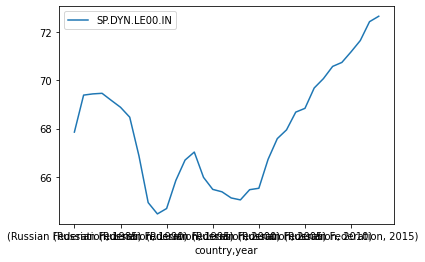

In [44]:
data.plot(y='SP.DYN.LE00.IN')

Задание 12.2. Получить данные о продолжительности жизни в России с 1960 по 2018 годы. Определить мин. и макс. показатели. Построить график.


In [45]:
# поиск индикаторов, связанных с численностью населения
pa_data_all = wb.download(indicator='SP.POP.TOTL', 
                          country=countries['iso2c'],
                          start='1960', 
                          end='2018')
pa_data = pa_data_all.loc[[['Russian Federation', str(year)] for year in range(1960, 2018)]]

In [46]:
#Ваш код
print(f'min: {tuple(pa_data.idxmin())[0][1]}: {float(pa_data.min())}')
print(f'max: {tuple(pa_data.idxmax())[0][1]}: {float(pa_data.max())}')

min: 1960: 119897000.0
max: 1992: 148538197.0


<AxesSubplot:xlabel='country,year'>

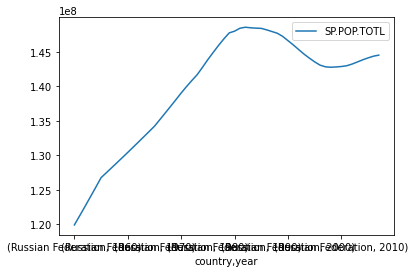

In [47]:
pa_data.plot(y='SP.POP.TOTL')

Задание 12.3. Получить данные о ВВП в России с 1991 по 2018 годы. Определить мин. и макс. показатели. Построить график.

In [48]:
# поиск индикаторов, связанных с ВВП
ga_data_all = wb.download(indicator='NY.GDP.MKTP.CD', 
                          country=countries['iso2c'],
                          start='1991', 
                          end='2018')
ga_data = ga_data_all.loc[[['Russian Federation', str(year)] for year in range(1991, 2019)]]

In [49]:
#Ваш код
print(f'min: {tuple(ga_data.idxmin())[0][1]}: {float(ga_data.min())}')
print(f'max: {tuple(ga_data.idxmax())[0][1]}: {float(ga_data.max())}')

min: 1999: 195907128350.934
max: 2013: 2292473246621.08


<AxesSubplot:xlabel='country,year'>

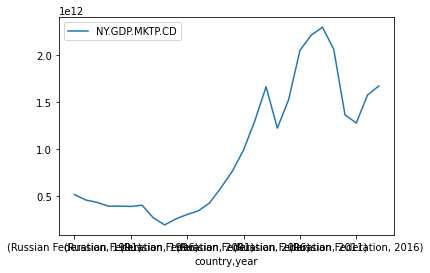

In [50]:
ga_data.plot(y='NY.GDP.MKTP.CD')